In [1]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os


# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行的模型
model = keras.models.Sequential()

model.add(Conv2D(filters=12, kernel_size=(3, 3),
                 activation='relu', padding='same',
                 input_shape=(28, 28, 1))) # 高 寬 RGB
model.add(MaxPooling2D(pool_size=(2, 2)))  # kernel_size=(2, 2)
model.add(Flatten())                       # fully-connected layer

# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=400,  activation='relu')) 
model.add(Dense(units=200, activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1

y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28, 28, 1).astype('float32')  
X_test_2D = X_test.reshape(10000, 28, 28, 1).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 12)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               941200    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 1,023,530
Trainable params: 1,023,530
Non-trainable params: 0
____________________________________________

In [2]:
x_Train_norm.min(), x_Train_norm.max()

(0.0, 1.0)

In [3]:
# 進行訓練, 訓練過程會存在 train_history 變數中
# calllback
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=50, 
                          batch_size=200, 
                          verbose=2)  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 3s - loss: 0.3301 - accuracy: 0.9069 - val_loss: 0.1233 - val_accuracy: 0.9628
Epoch 2/50
 - 1s - loss: 0.0943 - accuracy: 0.9716 - val_loss: 0.0924 - val_accuracy: 0.9722
Epoch 3/50
 - 1s - loss: 0.0607 - accuracy: 0.9818 - val_loss: 0.0837 - val_accuracy: 0.9743
Epoch 4/50
 - 1s - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0595 - val_accuracy: 0.9826
Epoch 5/50
 - 1s - loss: 0.0314 - accuracy: 0.9897 - val_loss: 0.0732 - val_accuracy: 0.9792
Epoch 6/50
 - 1s - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0551 - val_accuracy: 0.9845
Epoch 7/50
 - 1s - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0572 - val_accuracy: 0.9834
Epoch 8/50
 - 1s - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0590 - val_accuracy: 0.9839
Epoch 9/50
 - 1s - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0658 - val_accuracy: 0.9823
Epoch 10/50
 - 1s - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0604 - val_accuracy: 0.9846
Epoch 11/50
 - 1s -

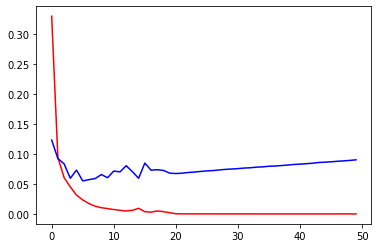

In [4]:
%matplotlib inline
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

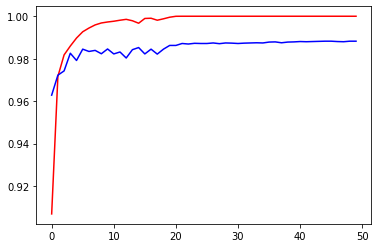

In [5]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()

In [6]:
# 顯示訓練成果(分數) 98.7%
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


60000/60000 [==============================] - 3s 46us/step

	[Info] Accuracy of training data = 99.8%


In [7]:
x_Test_norm.shape


(10000, 28, 28, 1)

In [8]:
# 顯示訓練成果(分數) 96.2%
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 1s 55us/step

	[Info] Accuracy of testing data = 98.7%


In [9]:
# how to read sample image and detect 
!dir *.jpg

 Volume in drive C is OSDisk
 Volume Serial Number is 4621-6696

 Directory of c:\python\20210906-Python-第三階段-13\day09-20211006-chap05-CNN

09/29/2021  09:33 PM               847 1.jpg
09/29/2021  09:37 PM               241 2.jpg
09/29/2021  09:31 PM             1,003 3.jpg
09/29/2021  09:35 PM             1,101 4.jpg
09/29/2021  09:33 PM             1,004 5.jpg
10/04/2021  08:50 PM             4,885 andy3.jpg
               6 File(s)          9,081 bytes
               0 Dir(s)  102,448,807,936 bytes free


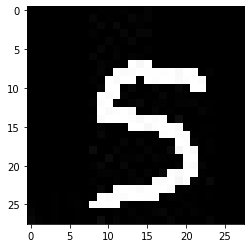

In [10]:
import matplotlib.pyplot as plt
from skimage import color
test = color.rgb2gray(plt.imread('5.jpg')) 
plt.imshow(test, cmap='gray')
plt.show()


In [11]:
test.shape

(28, 28)

In [12]:
# ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (1,)

In [14]:
# 考你
import numpy as np
# 舊版 
model.predict_proba(test.reshape(1, 28, 28, 1)), \
np.argmax(model.predict_proba(test.reshape(1, 28, 28, 1)))

# 新版
# model.predict(test.reshape(1, 28, 28, 1)), \
# np.argmax(model.predict(test.reshape(1, 28,28,1)), axis=1)

# ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (1, 784)

(array([[5.1271161e-32, 2.6635424e-21, 8.6437662e-28, 4.4144088e-09,
         7.9016711e-29, 1.0000000e+00, 8.1918515e-26, 2.5756099e-31,
         5.6812681e-16, 4.2603643e-14]], dtype=float32), 5)

In [ ]:
####################
# # 抽出 kernel
####################
# model.add(Conv2D(filters=12, kernel_size=(3, 3),
#                  activation='relu', padding='same',
#                  input_shape=(28, 28, 1))) # 高 寬 RGB

In [15]:
model.layers

In [57]:
cnn = model.layers[0]
# print(dir(cnn)) #
weights = cnn.get_weights()
weights[0].shape

(3, 3, 1, 12)

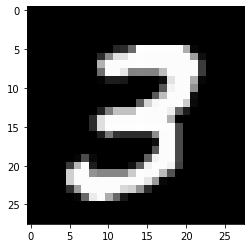

In [45]:
plt.imshow(X_train[7], cmap='gray')
plt.show()

In [29]:
def convimg(img , kernel):
    height, width = img.shape[0]-3+1, img.shape[1]-3+1
    conv = np.zeros((height, width))    
    for ii in range(height):
        for jj in range(width):                
            val = np.sum(kernel * img[ii:ii+3, jj:jj+3])
            conv[ii, jj] = val
    return(conv)

In [52]:
weights[0][:, :, :, 0].shape, \
weights[0][..., 0].shape

((3, 3, 1), (3, 3, 1))

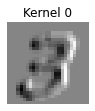

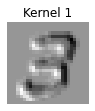

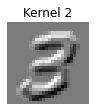

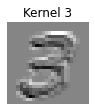

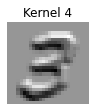

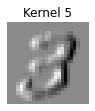

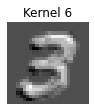

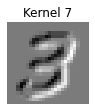

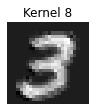

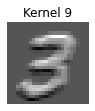

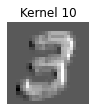

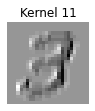

In [62]:
for i in range(weights[0].shape[-1]):
    k = weights[0][..., i].reshape(3, 3)
    plt.figure(figsize=(1.5 , 1.5))
    plt.title('Kernel {}'.format(i))
    plt.imshow(convimg(X_train[7], k), cmap='gray')
    plt.axis('off')
    plt.show()

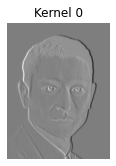

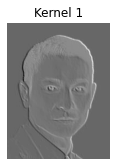

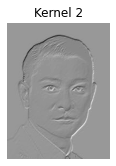

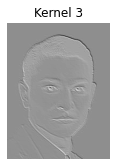

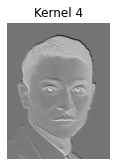

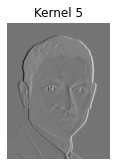

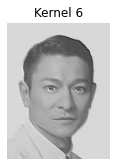

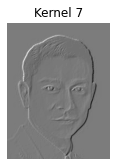

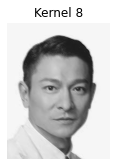

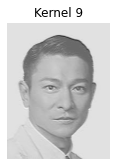

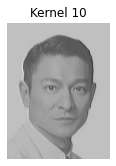

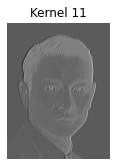

In [61]:
import matplotlib.pyplot as plt
from skimage import color
andy3 = plt.imread('andy3.jpg')
andy_gray = color.rgb2gray(andy3)  # 這裡是黑白!!!
for i in range(weights[0].shape[-1]):
    k = weights[0][..., i].reshape(3, 3)
    plt.figure(figsize=(2.5 , 2.5))
    plt.title('Kernel {}'.format(i))
    plt.imshow(convimg(andy_gray, k), cmap='gray')
    plt.axis('off')
    plt.show()